<a href="https://colab.research.google.com/github/MelettaLM/MelettaLM/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


**DATA PREPERATION**

In [6]:
df1 = pd.read_csv('/content/VALIDATE_DATA.CSV', sep='\t')

print(df1.shape)

df1.columns = ['index', 'id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context', 'justification']

df = pd.concat([df1], axis=0)
print(df.shape)
df.head()









(1283, 16)
(1283, 16)


,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,Ellison used a Koran that once belonged to Tho...
1,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
2,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
3,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
4,5,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...


In [7]:
df1.head(15)

,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,Ellison used a Koran that once belonged to Tho...
1,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
2,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
3,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
4,5,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...
5,6,6861.json,true,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...,"However, even Huffman, who is very sympathetic..."
6,7,1122.json,false,The health care reform plan would set limits s...,health-care,club-growth,NaN,NaN,none,4,5,4,2,0,a TV ad,"So, back to the Club for Growth ad. There is n..."
7,8,13138.json,true,Says Donald Trump started his career back in 1...,"candidates-biography,diversity,housing",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,the first presidential debate,"Clinton said that Trump ""started his career ba..."
8,9,1880.json,half-true,Bill White has a long history of trying to lim...,military,republican-party-texas,NaN,Texas,republican,3,1,1,3,1,an e-mail,Did White's positions which he hasn't backed ...
9,10,12803.json,half-true,John McCains chief economic adviser during the...,economy,tim-kaine,U.S. Senator,Virginia,democrat,8,3,15,15,0,a speech at the Democratic National Convention...,"Kaine said ""John McCains chief economic advise..."


In [8]:
df1.shape

(1283, 16)

In [9]:
df1.head(15)

,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,Ellison used a Koran that once belonged to Tho...
1,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
2,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
3,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
4,5,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...
5,6,6861.json,true,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...,"However, even Huffman, who is very sympathetic..."
6,7,1122.json,false,The health care reform plan would set limits s...,health-care,club-growth,NaN,NaN,none,4,5,4,2,0,a TV ad,"So, back to the Club for Growth ad. There is n..."
7,8,13138.json,true,Says Donald Trump started his career back in 1...,"candidates-biography,diversity,housing",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,the first presidential debate,"Clinton said that Trump ""started his career ba..."
8,9,1880.json,half-true,Bill White has a long history of trying to lim...,military,republican-party-texas,NaN,Texas,republican,3,1,1,3,1,an e-mail,Did White's positions which he hasn't backed ...
9,10,12803.json,half-true,John McCains chief economic adviser during the...,economy,tim-kaine,U.S. Senator,Virginia,democrat,8,3,15,15,0,a speech at the Democratic National Convention...,"Kaine said ""John McCains chief economic advise..."


In [10]:
df1.isna().sum()

index              0
id                 0
label              0
statement          0
subject            0
speaker            0
JobTitle         345
State            279
Party              0
BTC                0
FC                 0
HT                 0
MT                 0
POF                0
context           12
justification      4
dtype: int64

<ipython-input-11-523c1e590e48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

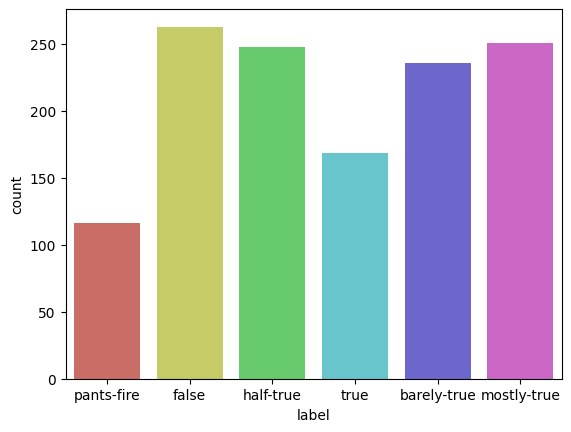

In [11]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df1)

In [12]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df1.isnull().sum()
    df1.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1283 non-null   int64 
 1   id             1283 non-null   object
 2   label          1283 non-null   object
 3   statement      1283 non-null   object
 4   subject        1283 non-null   object
 5   speaker        1283 non-null   object
 6   JobTitle       938 non-null    object
 7   State          1004 non-null   object
 8   Party          1283 non-null   object
 9   BTC            1283 non-null   int64 
 10  FC             1283 non-null   int64 
 11  HT             1283 non-null   int64 
 12  MT             1283 non-null   int64 
 13  POF            1283 non-null   int64 
 14  context        1271 non-null   object
 15  justification  1279 non-null   object
dtypes: int64(6), object(10)
memory usage: 160.5+ KB
check finished.


In [13]:
df1 = df1.dropna()

In [14]:
df1.shape

(857, 16)

In [15]:
df1.head(10)

,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
1,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
2,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
3,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
4,5,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...
5,6,6861.json,true,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...,"However, even Huffman, who is very sympathetic..."
7,8,13138.json,true,Says Donald Trump started his career back in 1...,"candidates-biography,diversity,housing",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,the first presidential debate,"Clinton said that Trump ""started his career ba..."
9,10,12803.json,half-true,John McCains chief economic adviser during the...,economy,tim-kaine,U.S. Senator,Virginia,democrat,8,3,15,15,0,a speech at the Democratic National Convention...,"Kaine said ""John McCains chief economic advise..."
11,12,7313.json,half-true,State revenue projections have missed the mark...,state-budget,steve-henson,State Senator,Georgia,democrat,0,0,1,0,0,a press release,Revenue increased less than 5 percent in three...
12,13,4809.json,true,The median income of a middle class family wen...,"income,new-hampshire-2012",joe-biden,U.S. senator,Delaware,democrat,11,10,21,16,4,speaking at New Hampshire’s Plymouth State Uni...,"""Clearly median inflation adjusted income fell..."
13,14,1671.json,barely-true,Every citizen is entitled to the freedom of sp...,gays-and-lesbians,david-dewhurst,Lieutenant governor,Texas,republican,8,8,10,5,5,a press release,"Yet that's not the ""vast majority of American..."


In [16]:
df1.reset_index(drop= True,inplace=True)

In [17]:
df1.head(10)

,index,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
1,3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
2,4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
3,5,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...
4,6,6861.json,true,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...,"However, even Huffman, who is very sympathetic..."
5,8,13138.json,true,Says Donald Trump started his career back in 1...,"candidates-biography,diversity,housing",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,the first presidential debate,"Clinton said that Trump ""started his career ba..."
6,10,12803.json,half-true,John McCains chief economic adviser during the...,economy,tim-kaine,U.S. Senator,Virginia,democrat,8,3,15,15,0,a speech at the Democratic National Convention...,"Kaine said ""John McCains chief economic advise..."
7,12,7313.json,half-true,State revenue projections have missed the mark...,state-budget,steve-henson,State Senator,Georgia,democrat,0,0,1,0,0,a press release,Revenue increased less than 5 percent in three...
8,13,4809.json,true,The median income of a middle class family wen...,"income,new-hampshire-2012",joe-biden,U.S. senator,Delaware,democrat,11,10,21,16,4,speaking at New Hampshire’s Plymouth State Uni...,"""Clearly median inflation adjusted income fell..."
9,14,1671.json,barely-true,Every citizen is entitled to the freedom of sp...,gays-and-lesbians,david-dewhurst,Lieutenant governor,Texas,republican,8,8,10,5,5,a press release,"Yet that's not the ""vast majority of American..."


In [18]:
label_train = df1.label

In [22]:
label_train.head(100)

0           false
1       half-true
2       half-true
3           false
4            true
         ...     
95           true
96     pants-fire
97    mostly-true
98           true
99           true
Name: label, Length: 100, dtype: object

In [20]:
df1 = df1.drop("label", axis = 1)

In [23]:
df1.head(100)

,index,id,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context,justification
0,2,7891.json,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,"However, we have two professors who say the la..."
1,3,8169.json,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,"In fact, if you use federal definitions for po..."
2,4,929.json,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,Obama's point is that some perspective is in o...
3,5,9416.json,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",Rubens said when armed civilians stop mass sho...
4,6,6861.json,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...,"However, even Huffman, who is very sympathetic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,136,3927.json,The budget currently being debated significant...,state-budget,ron-amstutz,State representative,Ohio,republican,0,0,0,1,0,a newspaper column,"Again, he says the state is relying on $1. 2 b..."
96,137,3379.json,Damage by protesters to the Wisconsin state Ca...,"labor,state-budget",mike-huebsch,"Secretary, Department of Administration",Wisconsin,republican,0,1,0,0,1,a statement made by a staffer during a court h...,"The new estimate: $347,500, some 20 times less..."
97,138,8895.json,Americans work way more than an average of ind...,jobs,keith-ellison,"Member, U.S. House of Representatives",Minnesota,democrat,0,0,0,1,0,"comments on ABC's ""This Week""",Ellison said that an average U. S. employee w...
98,139,13322.json,Says Ted Strickland in this campaign bragged a...,guns,rob-portman,U.S. senator from Ohio,Ohio,republican,3,5,11,11,1,the Ohio Senate debate,"Portman said Strickland ""in this campaign brag..."


In [25]:
df1['statement'][99]

'Says new Medicare billing guidelines have nine codes for (injuries by) turkeys.'

**PRE PROCESSING OF DATA**

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
print(nltk.data.path)


# Attempt to download stopwords again
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
for x in range(len(df1)) :
    corpus = []
    review = df1['statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    df1['statement'][x] = review

<ipython-input-28-9a11161753e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['statement'][x] = review
<ipython-input-28-9a11161753e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['statement'][x] = review
<ipython-input-28-9a11161753e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['statement'][x] = review
<ipython-input-28-9a11161753e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [30]:
df1['statement'][99]

'say new medicare billing guideline nine code injury turkey'

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA**

In [31]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(df1['statement'], label_train, test_size=0.2, random_state=0)

In [32]:
X_train

196    obama instead nominating health professional n...
645    union job youre making average week nonunion j...
122               tsa accept driver priv card id airport
851                  supported surge argued im one stage
167                       musical mamma mia selling year
                             ...                        
835             heroin come united state southern border
192    guess governor there fried butter newark perce...
629    debt nearly trillion president obama sworn office
559    proposed budget would cut deficit half end fir...
684         rhode island one worst state income equality
Name: statement, Length: 685, dtype: object

In [33]:
X_train.shape

(685,)

In [34]:
Y_train

196          false
645    mostly-true
122           true
851          false
167           true
          ...     
835           true
192           true
629          false
559    mostly-true
684    barely-true
Name: label, Length: 685, dtype: object

**CONVERTING THE TEXTUAL DATA TO NUMERICAL DATA**

In [35]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

print(tfidf_X_train,tfidf_X_test)

  (0, 939)	0.28203414023459383
  (0, 2162)	0.3360226039198875
  (0, 31)	0.31609706832325773
  (0, 108)	0.3360226039198875
  (0, 2069)	0.31609706832325773
  (0, 1507)	0.3360226039198875
  (0, 1736)	0.3360226039198875
  (0, 1032)	0.18880507801936297
  (0, 1508)	0.31609706832325773
  (0, 1150)	0.31609706832325773
  (0, 1530)	0.1830169349147674
  (1, 1514)	0.28538439671431026
  (1, 2401)	0.5369232313198916
  (1, 168)	0.20726152551440824
  (1, 1361)	0.4661963752110346
  (1, 2452)	0.4790638607328824
  (1, 1208)	0.28826213979150916
  (1, 2320)	0.2395319303664412
  (2, 69)	0.3812108733575457
  (2, 1092)	0.3641612760060912
  (2, 343)	0.3401312181912551
  (2, 1721)	0.40524093117238186
  (2, 684)	0.40524093117238186
  (2, 13)	0.3641612760060912
  (2, 2290)	0.3812108733575457
  :	:
  (681, 2316)	0.2926206108085143
  (681, 1637)	0.202725620299715
  (682, 2168)	0.51606956716888
  (682, 1540)	0.36399715984994313
  (682, 2279)	0.36920431470945747
  (682, 578)	0.36399715984994313
  (682, 1711)	0.289970

In [36]:
tfidf_X_train.shape

(685, 2459)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**CLASSIFICATION MODEL:-PASSIVE AGGRESSIVE CLASSIFIER**

In [38]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 29.65%
Confusion matrix, without normalization


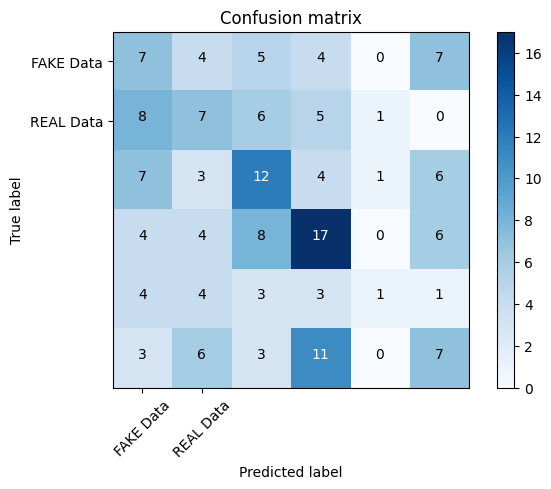

In [39]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**CLASSIFICATION REPORT**

In [40]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

 barely-true       0.21      0.26      0.23        27
       false       0.25      0.26      0.25        27
   half-true       0.32      0.36      0.34        33
 mostly-true       0.39      0.44      0.41        39
  pants-fire       0.33      0.06      0.11        16
        true       0.26      0.23      0.25        30

    accuracy                           0.30       172
   macro avg       0.29      0.27      0.27       172
weighted avg       0.30      0.30      0.29       172



**SAVING & LOADING MODEL**

In [41]:
#pickling the model into disk
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

# load the model from disk
loaded_model = pickle.load(open('./model.pkl', 'rb'))
#vector_form = pickle.load(open('vector.pkl', 'rb'))

**BUILDING A PREDICTIVE SYSTEM**

In [42]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [43]:
X_test

144    friend sister died obamacare becauseblue shiel...
774    say hillary clinton asked repeatedly provide s...
263    half science technology engineering mathematic...
788    gov bob mcdonnell job lost created southside s...
846          say every day special session cost taxpayer
                             ...                        
156    say donald trump think climate change hoax inv...
597    three half year campaigning lamar smith never ...
624    social security first started worker every ret...
50     people running budget corzine year decided ste...
822    hb voter suppression bill invalidates vote vot...
Name: statement, Length: 172, dtype: object

In [46]:
X_test[788]


'gov bob mcdonnell job lost created southside southwest virginia'

In [47]:
Y_test[788]

'false'

In [53]:
news=str(input("Enter the News:"))
fake_news_det(news)

Enter the News:Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor
Prediction of the News : Looking Real News📰 


**MANUAL PREDICTION**

In [49]:

print(tfidf_X_test)

  (0, 2014)	0.4891480596445371
  (0, 1531)	0.36097166039997663
  (0, 635)	0.46014246013792387
  (0, 463)	0.4891480596445371
  (0, 321)	0.4235997264615167
  (1, 1998)	0.37405048359747406
  (1, 1974)	0.2984942988124907
  (1, 1945)	0.1446508757876067
  (1, 1758)	0.3443448415675326
  (1, 1119)	0.3443448415675326
  (1, 1058)	0.31701308898195163
  (1, 423)	0.310163744447091
  (1, 224)	0.3976291781592219
  (1, 142)	0.3976291781592219
  (2, 2321)	0.29891046354376816
  (2, 2140)	0.3136464631920272
  (2, 2107)	0.19317644189601163
  (2, 1956)	0.3930380302148197
  (2, 1810)	0.3930380302148197
  (2, 1012)	0.3136464631920272
  (2, 600)	0.41781362621581053
  (2, 404)	0.32590827310017306
  (2, 94)	0.2946947135896365
  (3, 2359)	0.341214271821406
  (3, 2078)	0.4279846958882743
  :	:
  (170, 2443)	0.15230867077838467
  (170, 2426)	0.2960284986077962
  (170, 2316)	0.23235007163252344
  (170, 2286)	0.30988820044422677
  (170, 2036)	0.3294223530438719
  (170, 1919)	0.2960284986077962
  (170, 1632)	0.186316

In [50]:
print(Y_test)

144     pants-fire
774    barely-true
263      half-true
788          false
846          false
          ...     
156    mostly-true
597           true
624           true
50     barely-true
822    mostly-true
Name: label, Length: 172, dtype: object


In [51]:
X_new=tfidf_X_test[3]
prediction = loaded_model.predict(X_new)

if (prediction[0] == 1):
	print("Prediction of the News :  Looking Fake⚠ News📰 ")
else:
	print("Prediction of the News : Looking Real News📰 ")

Prediction of the News : Looking Real News📰 


In [52]:
print(Y_test[0:16000])

144     pants-fire
774    barely-true
263      half-true
788          false
846          false
          ...     
156    mostly-true
597           true
624           true
50     barely-true
822    mostly-true
Name: label, Length: 172, dtype: object
